In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample

sns.set_style('whitegrid')
sns.set_palette('pastel')

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\ompan\OneDrive\Desktop\archive (1)\Churn_Modelling.csv")

# Display the first few rows of the dataframe
print(df.head())

# Display the column names
print(df.columns)

# Display information about the dataframe
print(df.info())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

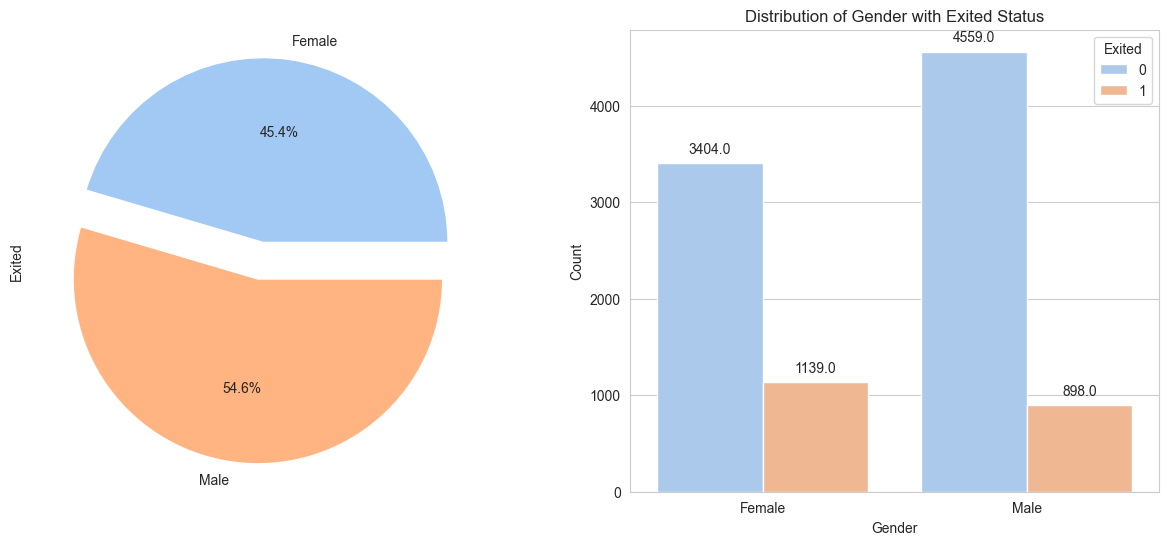

In [3]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 6))

explode = [0.1, 0.1]
df.groupby('Gender')['Exited'].count().plot.pie(explode=explode, autopct="%1.1f%%", ax=ax[0])

sns.countplot(x="Gender", hue="Exited", data=df, ax=ax[1])

for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Distribution of Gender with Exited Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\ompan\OneDrive\Desktop\archive (1)\Churn_Modelling.csv")

# Display the first few rows of the dataframe
print(df.head())

# Display the column names
print(df.columns)

# Drop specified columns
columns_to_drop = ['RowNumber', 'Surname', 'CustomerId']
df = df.drop(columns=columns_to_drop)

# Display information about the dataframe after dropping columns
print(df.info())



   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [9]:
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=0),
    "Logistic Regression": LogisticRegression(),
    "LinearSVC": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=60, random_state=0),
    "XGB": XGBClassifier(random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}\n{report}\nAccuracy: {accuracy:.2f}\n")




NameError: name 'x_train' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Example list of algorithms
Algorithms = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# Example lists of precision, recall, and accuracy scores corresponding to each algorithm
precision_list = [0.85, 0.78, 0.92]
recall_list = [0.75, 0.82, 0.88]
accuracy_list = [0.80, 0.75, 0.85]

plt.figure(figsize=(10, 6))

# Plot precision
plt.plot(Algorithms, precision_list, marker='o', linestyle='-', color='skyblue', label='Precision')

# Plot recall
plt.plot(Algorithms, recall_list, marker='o', linestyle='-', color='lightgreen', label='Recall')

# Plot accuracy
plt.plot(Algorithms, accuracy_list, marker='o', linestyle='-', color='salmon', label='Accuracy')

# Set labels and title
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Performance Metrics of Different Algorithms')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
import matplotlib.pyplot as plt

Algorithms = list(models.keys())
accuracy = [accuracy_score(model.predict(X_test), y_test) for model in models.values()]

FinalResult = pd.DataFrame({'Algorithm': Algorithms, 'Accuracy': accuracy})

plt.figure(figsize=(8, 6))

# Colors from the LGBTQ+ pride flag
colors = ['#FF0018', '#FFA52C', '#FFFF41', '#008018', '#0000F9', '#86007D']

plt.bar(FinalResult['Algorithm'], FinalResult['Accuracy'], color=colors)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


NameError: name 'models' is not defined

In [7]:
# Plotting confusion matrix heatmap for each algorithm
plt.figure(figsize=(18, 10))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)
    sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

NameError: name 'models' is not defined

<Figure size 1800x1000 with 0 Axes>